In [1]:
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


print("Q2.1.1 Data Preprocessing:")

# load dataset
penguins = seaborn.load_dataset('penguins')
print(f"Number of data points in the whole dataset originally: {len(penguins)}")

# drop NA value
penguins = penguins.dropna()
print(f"Number of data points in the whole dataset after deleting incomplete data: {len(penguins)}")

for text_column in ["species","island","sex"]:
    penguins[text_column] = LabelEncoder().fit_transform(penguins[text_column])

X = penguins.drop('species', axis=1)
y = penguins['species']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Number of data points in the training set after splitting: {len(X_train)}")
print(f"Number of data points in the test set after splitting: {len(X_test)}")

Q2.1.1 Data Preprocessing:
Number of data points in the whole dataset originally: 344
Number of data points in the whole dataset after deleting incomplete data: 333
Number of data points in the training set after splitting: 233
Number of data points in the test set after splitting: 100


Q2.1.2 Data Statistics:


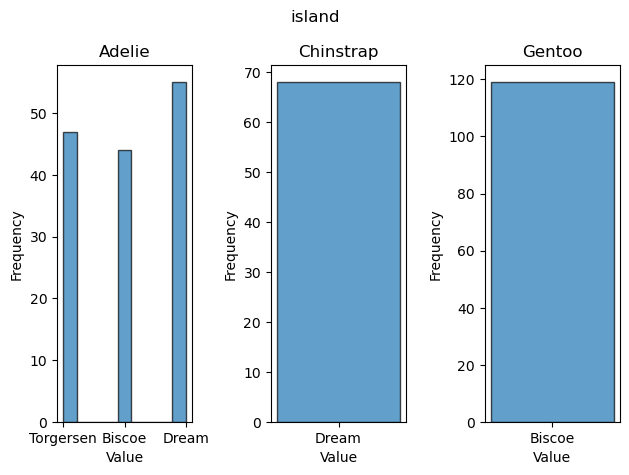

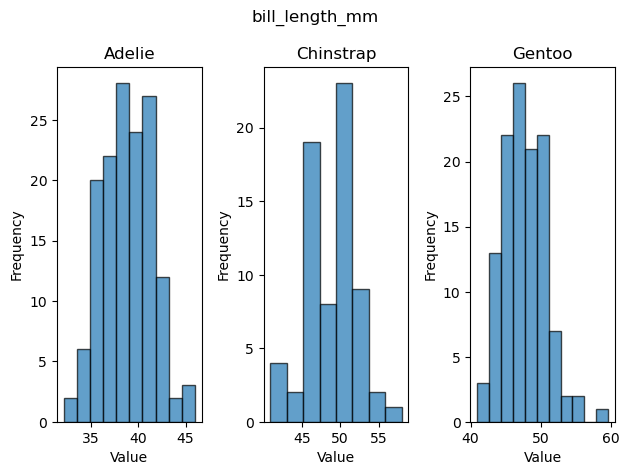

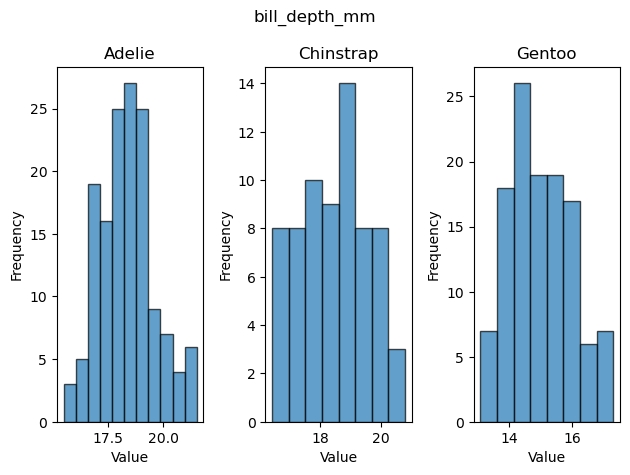

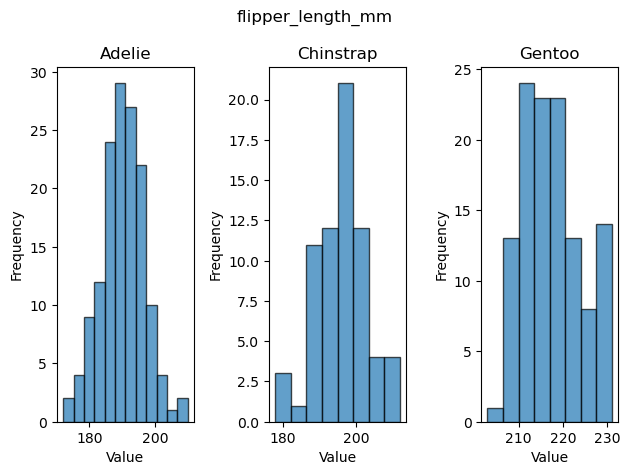

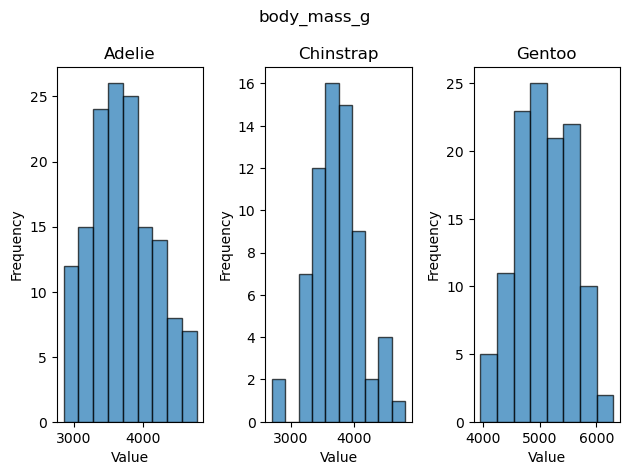

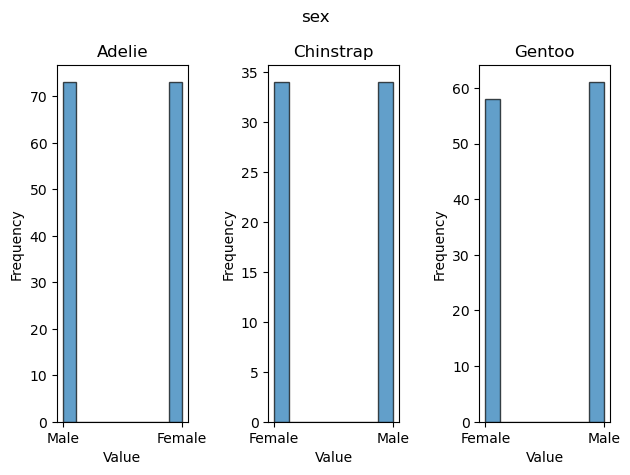

In [2]:
import matplotlib.pyplot as plt

penguins = seaborn.load_dataset('penguins')
penguins_cleaned2 = penguins.dropna()
classes = penguins_cleaned2['species'].unique()
features = penguins_cleaned2.columns.drop('species')

print("Q2.1.2 Data Statistics:")
for i, feature in enumerate(features):
    # Create a figure with 3 subfigures in a row
    fig, axs = plt.subplots(1, 3)

    # Set the title for the whole figure indicating the feature name
    fig.suptitle(feature)

    # Loop through each class
    for j, class_name in enumerate(classes):
        # Select the data for the current class and feature
        class_data = penguins_cleaned2[penguins_cleaned2['species'] == class_name][feature]

        # Plot the histogram for the current class and feature in the corresponding subfigure
        axs[j].hist(class_data, bins='auto', alpha=0.7, edgecolor="black")

        # Set the title for the subfigure indicating the class name and feature name
        axs[j].set_title(class_name)

        # Set the x and y labels for the subfigure
        axs[j].set_xlabel('Value')
        axs[j].set_ylabel('Frequency')

    # Adjust the layout to make it look nicer
    plt.tight_layout(rect=[0, 0, 1, 1])

    # Show the figure
    plt.show()


Q2.1.3 Decision Tree:
1. Results with maximum depth as 1 and least node size as 10:
training accuracy: 1.0, test accuracy: 0.99


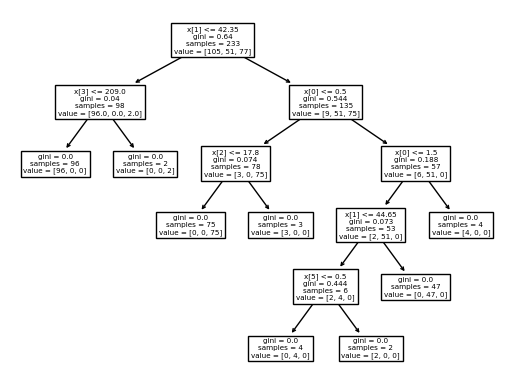

2. Results with maximum depth as 1 and least node size as 20:
training accuracy: 1.0, test accuracy: 0.99


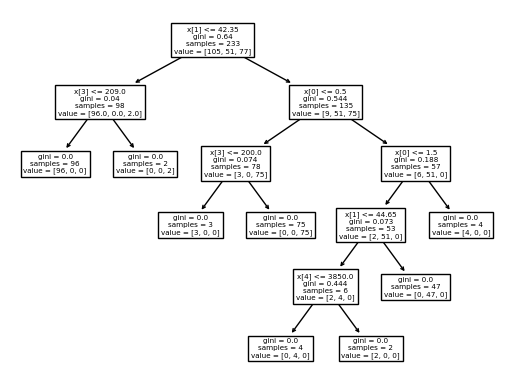

3. Results with maximum depth as 1 and least node size as 30:
training accuracy: 1.0, test accuracy: 0.98


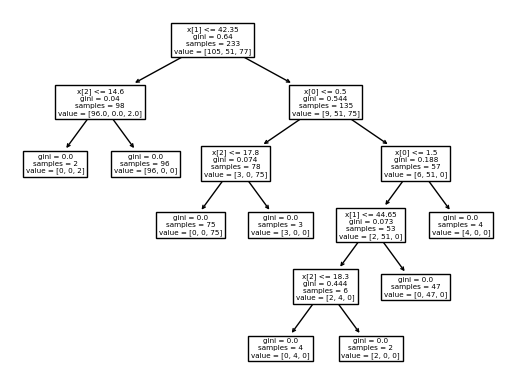

4. Results with maximum depth as 10 and least node size as 10:
training accuracy: 0.9527896995708155, test accuracy: 0.95


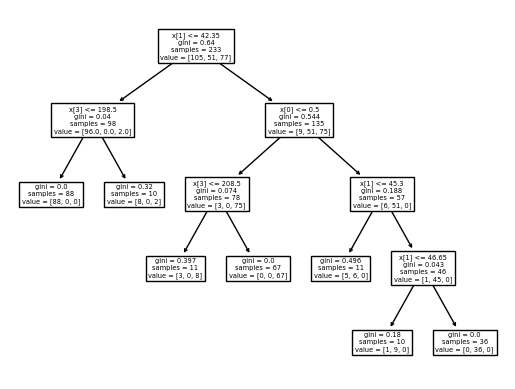

5. Results with maximum depth as 10 and least node size as 20:
training accuracy: 0.9527896995708155, test accuracy: 0.95


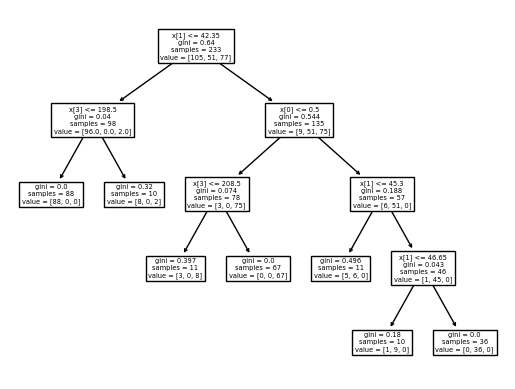

6. Results with maximum depth as 10 and least node size as 30:
training accuracy: 0.9527896995708155, test accuracy: 0.95


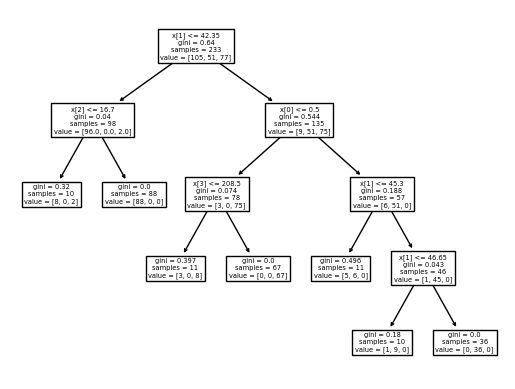

7. Results with maximum depth as 20 and least node size as 10:
training accuracy: 0.9527896995708155, test accuracy: 0.95


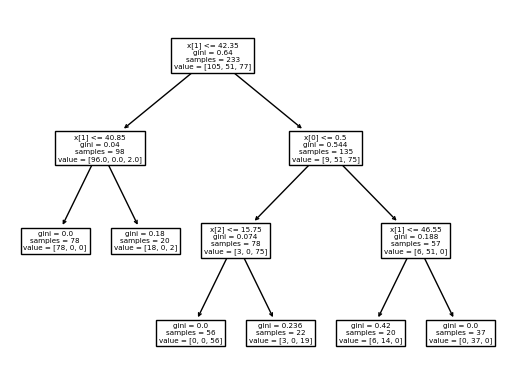

8. Results with maximum depth as 20 and least node size as 20:
training accuracy: 0.9527896995708155, test accuracy: 0.95


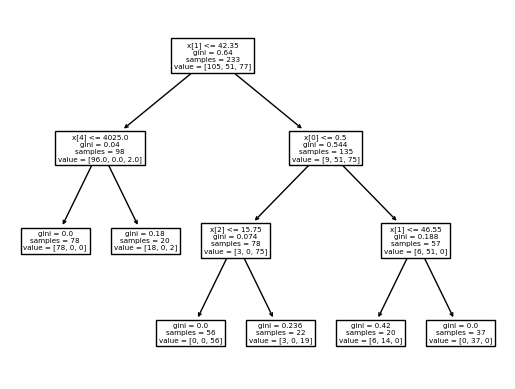

9. Results with maximum depth as 20 and least node size as 30:
training accuracy: 0.9527896995708155, test accuracy: 0.95


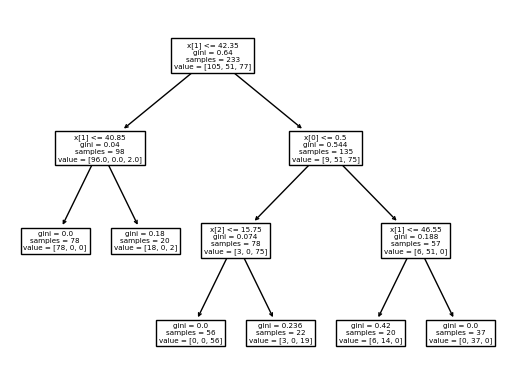

In [3]:
from sklearn import tree

print("Q2.1.3 Decision Tree:")
cnt = 1

# Set parameters
for min_samples_leaf in [1,10,20]:
    for max_depth in [10,20,30]:
        print(f"{cnt}. Results with maximum depth as {min_samples_leaf} and least node size as {max_depth}:")

        # train model
        clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth)
        clf.fit(X_train, y_train)

        # predict values
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # calculate accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        print(f"training accuracy: {train_acc}, test accuracy: {test_acc}")
        
        fig = plt.figure()
        tree.plot_tree(clf)
        plt.show()
        
        cnt += 1

In [4]:
print("Q2.1.4 Bagging of Trees:")
cnt = 1

# Set parameters
for n_trees in [1,5,10]:
    for max_depth in [1,2,3]:
        print(f"{cnt}. Results with maximum depth as {max_depth} and number of trees as {n_trees}:")

        # train model
        clf = BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                n_trees)
        clf.fit(X_train, y_train)

        # predict values
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # calculate accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        print(f"training accuracy: {train_acc}, test accuracy: {test_acc}\n")
        
        cnt += 1

Q2.1.4 Bagging of Trees:
1. Results with maximum depth as 1 and number of trees as 1:
training accuracy: 0.7339055793991416, test accuracy: 0.79

2. Results with maximum depth as 2 and number of trees as 1:
training accuracy: 0.9613733905579399, test accuracy: 0.97

3. Results with maximum depth as 3 and number of trees as 1:
training accuracy: 0.9656652360515021, test accuracy: 0.94

4. Results with maximum depth as 1 and number of trees as 5:
training accuracy: 0.944206008583691, test accuracy: 0.95

5. Results with maximum depth as 2 and number of trees as 5:
training accuracy: 0.9613733905579399, test accuracy: 0.95

6. Results with maximum depth as 3 and number of trees as 5:
training accuracy: 0.9828326180257511, test accuracy: 0.98

7. Results with maximum depth as 1 and number of trees as 10:
training accuracy: 0.9399141630901288, test accuracy: 0.95

8. Results with maximum depth as 2 and number of trees as 10:
training accuracy: 0.9699570815450643, test accuracy: 0.97

9. Res

In [5]:
print("Q2.1.5 Random Forests:")
cnt = 1

# Set parameters
for n_trees in [1,5,10]:
    for max_depth in [1,2,3]:
        print(f"{cnt}. Results with maximum depth as {max_depth} and number of trees as {n_trees}:")

        # train model
        clf = RandomForestClassifier(n_estimators=n_trees, max_depth=max_depth)

        clf.fit(X_train, y_train)

        # predict values
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # calculate accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        print(f"training accuracy: {train_acc}, test accuracy: {test_acc}\n")
        
        cnt += 1

Q2.1.5 Random Forests:
1. Results with maximum depth as 1 and number of trees as 1:
training accuracy: 0.648068669527897, test accuracy: 0.7

2. Results with maximum depth as 2 and number of trees as 1:
training accuracy: 0.7725321888412017, test accuracy: 0.82

3. Results with maximum depth as 3 and number of trees as 1:
training accuracy: 0.7682403433476395, test accuracy: 0.81

4. Results with maximum depth as 1 and number of trees as 5:
training accuracy: 0.776824034334764, test accuracy: 0.83

5. Results with maximum depth as 2 and number of trees as 5:
training accuracy: 0.9613733905579399, test accuracy: 0.95

6. Results with maximum depth as 3 and number of trees as 5:
training accuracy: 0.9656652360515021, test accuracy: 0.96

7. Results with maximum depth as 1 and number of trees as 10:
training accuracy: 0.7811158798283262, test accuracy: 0.83

8. Results with maximum depth as 2 and number of trees as 10:
training accuracy: 0.9742489270386266, test accuracy: 0.97

9. Results

Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:
bias2 - trees:


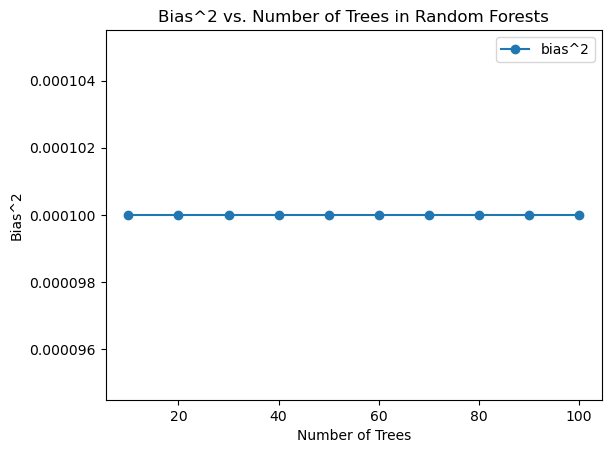

The bais^2 does not change as number of trees increases.

variance-trees:


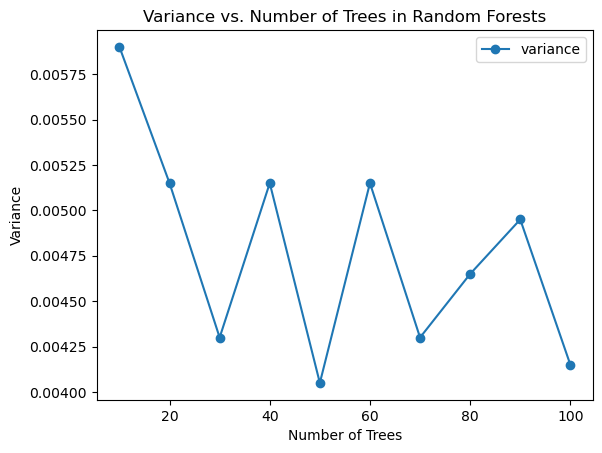

The variance first becomes lower and then tends to be stable as number of trees increases.


In [6]:
from mlxtend.evaluate import bias_variance_decomp

n_trees = [i for i in range(10, 101, 10)]
bias2 = []
variances = []

for n_tree in n_trees:
    # build model
    clf = RandomForestClassifier(n_estimators=n_tree)
    # calculate bais,var
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, 
                                                                X_train.values, y_train.values, X_test.values, y_test.values,
                                                                loss='0-1_loss')

    bias2.append(avg_bias**2)
    variances.append(avg_var)

print("Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:")

# plot figures for bias^2 and variance

print("bias2 - trees:")
plt.plot(n_trees, bias2, label = "bias^2", marker='o')
plt.title('Bias^2 vs. Number of Trees in Random Forests')
plt.xlabel('Number of Trees')
plt.ylabel('Bias^2')
plt.legend()
plt.show()
print("The bais^2 does not change as number of trees increases.\n")

print("variance-trees:")
plt.plot(n_trees, variances, label = "variance", marker='o')
plt.title('Variance vs. Number of Trees in Random Forests')
plt.xlabel('Number of Trees')
plt.ylabel('Variance')
plt.legend()
plt.show()
print("The variance first becomes lower and then tends to be stable as number of trees increases.")